In [ ]:
!pip install matplotlib

In [3]:
# Cell 1: make src/ importable
import sys, os
# notebooks/ is one level below project root
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, PROJECT_ROOT)

In [4]:
# Cell 1: Imports and setup\
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from src.data_engineering import load_joined_data
from src.utils import parse_date_column


In [5]:
# Cell 2: Load and prepare data
orders_df = load_joined_data()
orders_df = parse_date_column(orders_df, "signup_date")
orders_df = parse_date_column(orders_df, "order_date")

print("rows, cols:", orders_df.shape)
orders_df.head()


rows, cols: (5000, 5)


,order_id,customer_id,signup_date,order_date,order_amount
0,ad3ed4b1-f5e2-4479-beb0-325f7fe576b2,f1733a58-dab5-4864-812a-660cbfd0038a,2023-11-21,2025-05-07,331.95
1,4daa8e70-3709-4333-aa3f-518e81b40997,71e55fed-e858-4b07-9194-d7285f31095b,2025-05-05,2025-05-07,367.23
2,dd781460-0057-44cc-a78a-7f6031775a89,a410a796-21f3-49e0-bdf6-ab7bfb900150,2025-05-07,2025-05-07,211.36
3,b4c2c436-6dfd-49b3-b998-87d39b88c275,bf1d7980-41f8-4414-b00d-16565718719e,2024-02-22,2025-05-07,395.27
4,26f2c80e-9bf7-4f49-a3ef-a975789dbda6,a410a796-21f3-49e0-bdf6-ab7bfb900150,2025-05-07,2025-05-07,441.31


In [6]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      5000 non-null   object        
 1   customer_id   5000 non-null   object        
 2   signup_date   5000 non-null   datetime64[ns]
 3   order_date    5000 non-null   datetime64[ns]
 4   order_amount  5000 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 195.4+ KB


In [8]:
orders_df.describe(include="all")

,order_id,customer_id,signup_date,order_date,order_amount
count,5000,5000,5000,5000,5000.000000
unique,5000,500,NaN,NaN,NaN
top,74964cd0-466e-44d4-86f2-b93c5db12541,3dd26520-1d55-451c-990d-ba8a8d2b92ee,NaN,NaN,NaN
freq,1,20,NaN,NaN,NaN
mean,NaN,NaN,2024-05-11 18:23:02.399999744,2024-11-10 05:42:25.920000,252.898372
min,NaN,NaN,2023-05-09 00:00:00,2023-05-15 00:00:00,5.070000
25%,NaN,NaN,2023-11-02 00:00:00,2024-08-04 00:00:00,128.257500
50%,NaN,NaN,2024-05-11 00:00:00,2024-12-29 00:00:00,253.510000
75%,NaN,NaN,2024-11-21 00:00:00,2025-03-24 00:00:00,374.982500
max,NaN,NaN,2025-05-07 00:00:00,2025-05-07 00:00:00,499.900000


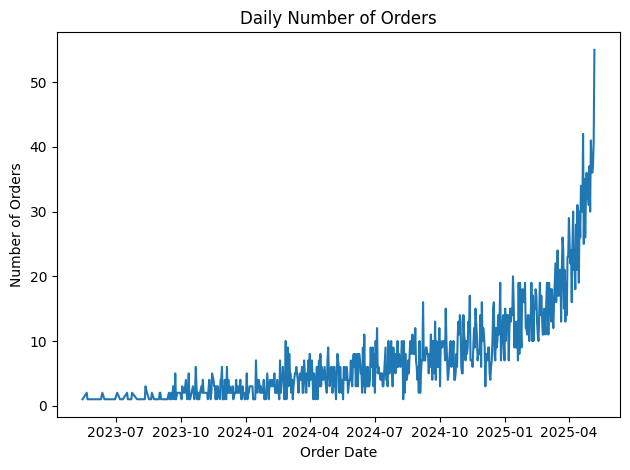

In [9]:
# Cell 4: Orders over time (daily volume)
daily_counts = orders_df.groupby("order_date").size()

plt.figure()
plt.plot(daily_counts.index, daily_counts.values)
plt.title("Daily Number of Orders")
plt.xlabel("Order Date")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


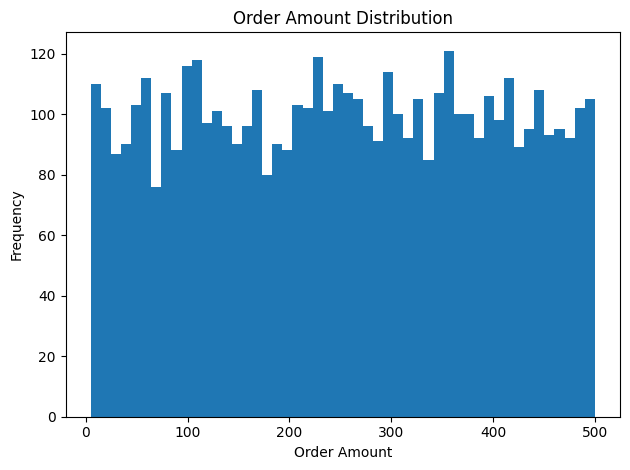

In [10]:
# Cell 5: Distribution of order amounts
plt.figure()
plt.hist(orders_df["order_amount"], bins=50)
plt.title("Order Amount Distribution")
plt.xlabel("Order Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


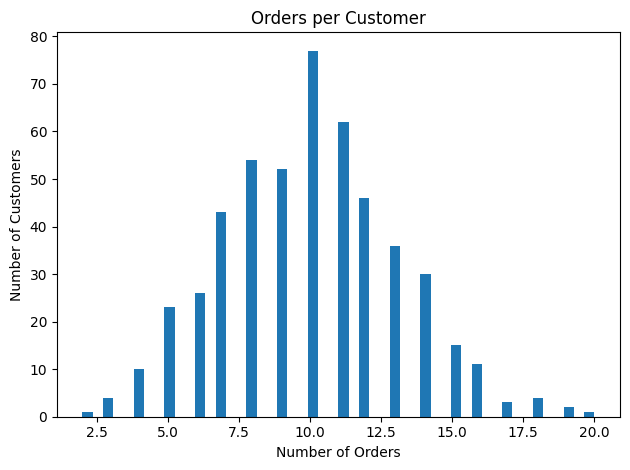

In [11]:
# Cell 6: Orders per customer (frequency)
freq = orders_df.groupby("customer_id").size()

plt.figure()
plt.hist(freq, bins=50)
plt.title("Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


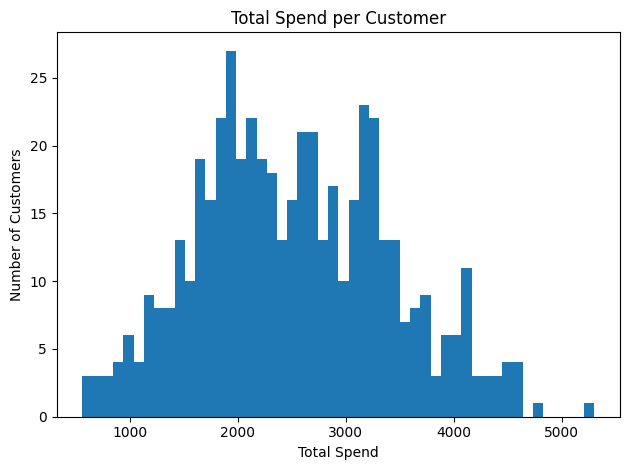

In [12]:
# Cell 7: Total spend per customer (monetary)
spend = orders_df.groupby("customer_id")["order_amount"].sum()

plt.figure()
plt.hist(spend, bins=50)
plt.title("Total Spend per Customer")
plt.xlabel("Total Spend")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


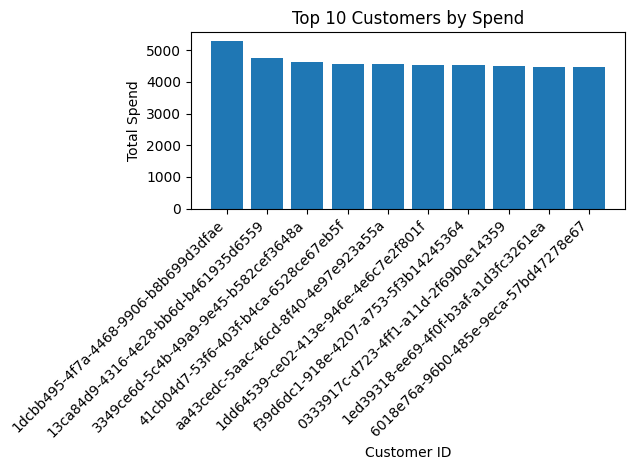

In [13]:
# Cell 8: Top 10 customers by total spend
top10 = spend.sort_values(ascending=False).head(10)

plt.figure()
plt.bar(top10.index.astype(str), top10.values)
plt.title("Top 10 Customers by Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


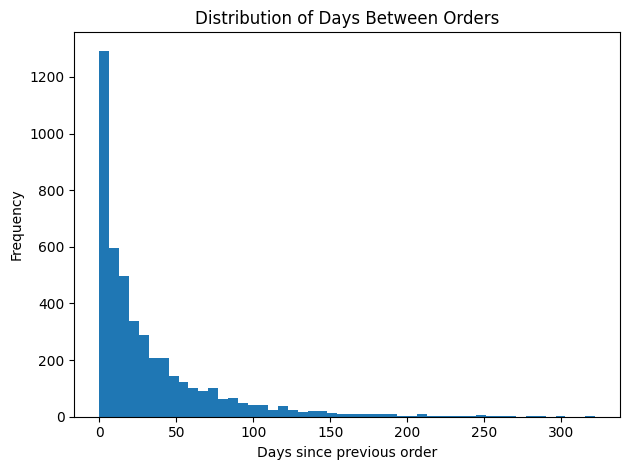

In [15]:
# Cell Z: Time-lag Analysis (days between successive orders)
# compute diffs per customer
order_lags = (
    orders_df.sort_values(["customer_id", "order_date"])
             .groupby("customer_id")["order_date"]
             .diff()
             .dt.days
             .dropna()
)

plt.figure()
plt.hist(order_lags, bins=50)
plt.title("Distribution of Days Between Orders")
plt.xlabel("Days since previous order")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


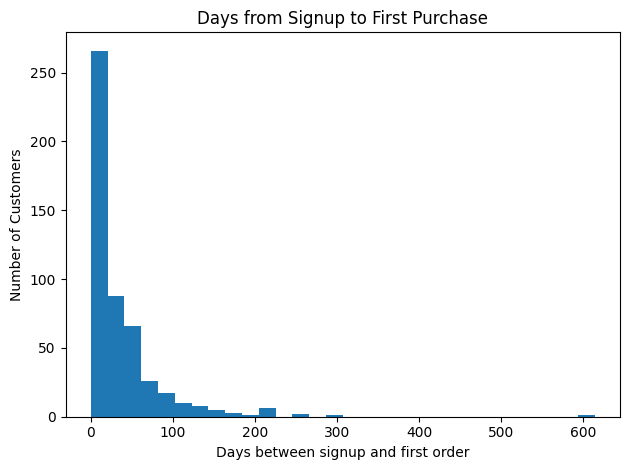

In [16]:
# Cell W: Signup → First Purchase Lag
# find first order date per customer and compute lag from signup
first_orders = (
    orders_df.groupby("customer_id")
             .agg(signup_date=("signup_date", "first"),
                  first_order=("order_date", "min"))
             .reset_index()
)
first_orders["days_to_first"] = (
    first_orders["first_order"] - first_orders["signup_date"]
).dt.days

plt.figure()
plt.hist(first_orders["days_to_first"], bins=30)
plt.title("Days from Signup to First Purchase")
plt.xlabel("Days between signup and first order")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


In [14]:
# load RFM scores (computed by your pipeline)
rfm_df = pd.read_csv(os.path.join(PROJECT_ROOT, "data", "processed", "rfm_scores.csv"))
print("RFM df preview:", rfm_df.head(), sep="\n")

RFM df preview:
                            customer_id  recency_days  frequency  monetary  R  \
0  0117a268-bc79-475b-bdff-e474976239a7             5         10   2707.41  5   
1  0127efd6-8ae6-46fe-8d71-60dc2ad92749            11         12   3396.70  4   
2  0179a338-974d-4bd1-a357-8b24450be175             6         11   2495.25  4   
3  01d8561e-29c8-42a2-a43d-51a832f886fc             7          9   2153.78  4   
4  0279faf1-65c6-4eef-aaff-cec9fb15f611           113          9   2727.16  1   

   F  M  rfm_segment  rfm_score  
0  3  3          533         11  
1  4  5          445         13  
2  3  3          433         10  
3  2  2          422          8  
4  2  3          123          6  


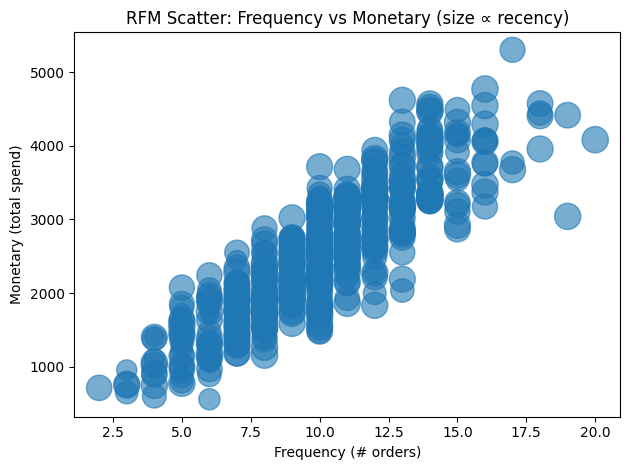

In [17]:
# Cell Y: RFM Scatter (Frequency vs Monetary, colored/radius by Recency)
plt.figure()
# plot each customer: x=frequency, y=monetary, size inversely ∝ recency_days
sizes = (rfm_df["recency_days"].max() - rfm_df["recency_days"] + 1)  # more recent → larger
plt.scatter(rfm_df["frequency"], rfm_df["monetary"], s=sizes, alpha=0.6)
plt.title("RFM Scatter: Frequency vs Monetary (size ∝ recency)")
plt.xlabel("Frequency (# orders)")
plt.ylabel("Monetary (total spend)")
plt.tight_layout()
plt.show()


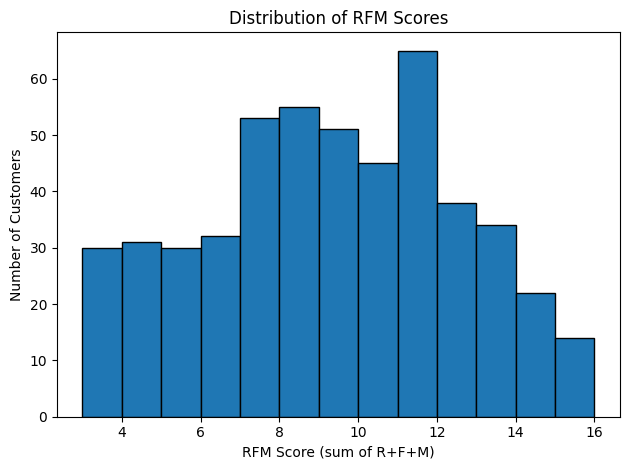

In [18]:
# ─── Cell: Distribution of overall RFM scores ────────────────────────────────────
plt.figure()
plt.hist(
    rfm_df["rfm_score"],
    bins=range(int(rfm_df["rfm_score"].min()), int(rfm_df["rfm_score"].max()) + 2),
    edgecolor="black"
)
plt.title("Distribution of RFM Scores")
plt.xlabel("RFM Score (sum of R+F+M)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


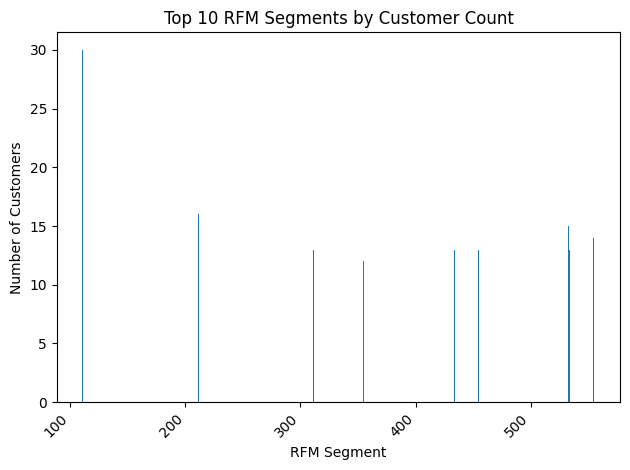

In [19]:
# ─── Cell: Top 10 RFM segments by customer count ────────────────────────────────
# which 3-digit segments are most common?
segment_counts = rfm_df["rfm_segment"].value_counts().nlargest(10)

plt.figure()
plt.bar(segment_counts.index, segment_counts.values)
plt.title("Top 10 RFM Segments by Customer Count")
plt.xlabel("RFM Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


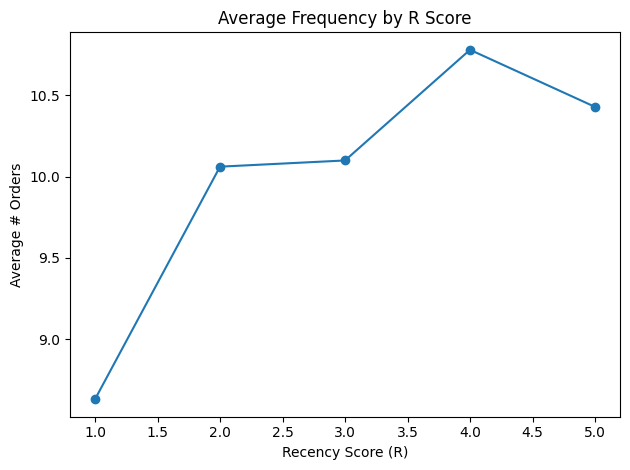

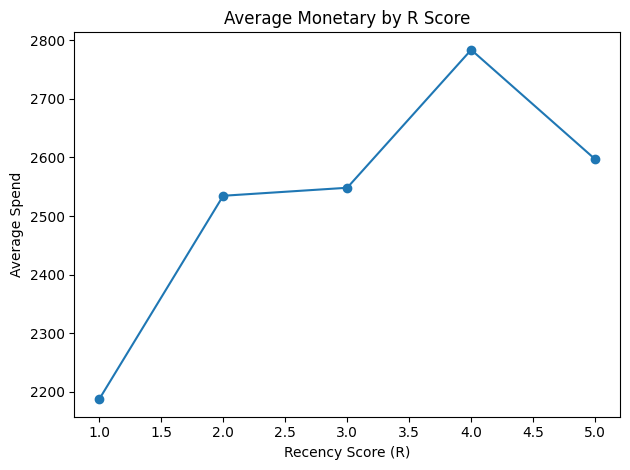

In [20]:
# ─── Cell: Average metrics grouped by R score ───────────────────────────────────
# see how frequency & monetary vary as recency gets better
rfm_by_R = (
    rfm_df.groupby("R")[["recency_days", "frequency", "monetary"]]
    .mean()
    .sort_index()
)

# Frequency vs R
plt.figure()
plt.plot(rfm_by_R.index, rfm_by_R["frequency"], marker="o")
plt.title("Average Frequency by R Score")
plt.xlabel("Recency Score (R)")
plt.ylabel("Average # Orders")
plt.tight_layout()
plt.show()

# Monetary vs R
plt.figure()
plt.plot(rfm_by_R.index, rfm_by_R["monetary"], marker="o")
plt.title("Average Monetary by R Score")
plt.xlabel("Recency Score (R)")
plt.ylabel("Average Spend")
plt.tight_layout()
plt.show()


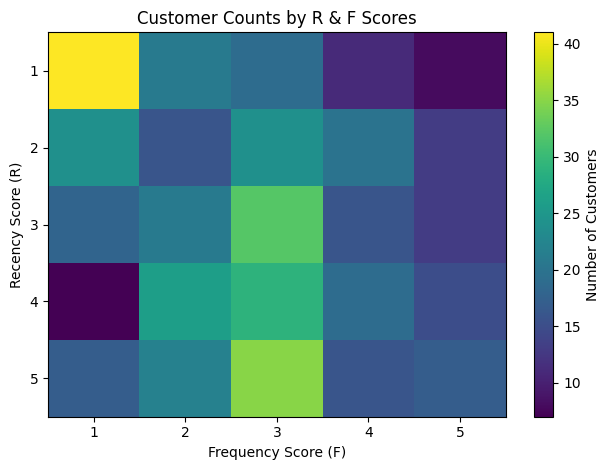

In [21]:
# ─── Cell: Heatmap of customer counts in the R×F matrix ─────────────────────────
# pivot to get counts for each combination of R and F
pivot_rf = rfm_df.pivot_table(
    index="R", columns="F", values="customer_id", aggfunc="count"
)

plt.figure()
plt.imshow(pivot_rf, aspect="auto")
plt.title("Customer Counts by R & F Scores")
plt.xlabel("Frequency Score (F)")
plt.ylabel("Recency Score (R)")
plt.xticks(ticks=range(len(pivot_rf.columns)), labels=pivot_rf.columns)
plt.yticks(ticks=range(len(pivot_rf.index)), labels=pivot_rf.index)
plt.colorbar(label="Number of Customers")
plt.tight_layout()
plt.show()


/var/folders/_z/8qwyks3170ddvfqylm11t5dr0000gp/T/ipykernel_8167/744192325.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=sorted(rfm_df["F"].unique()))


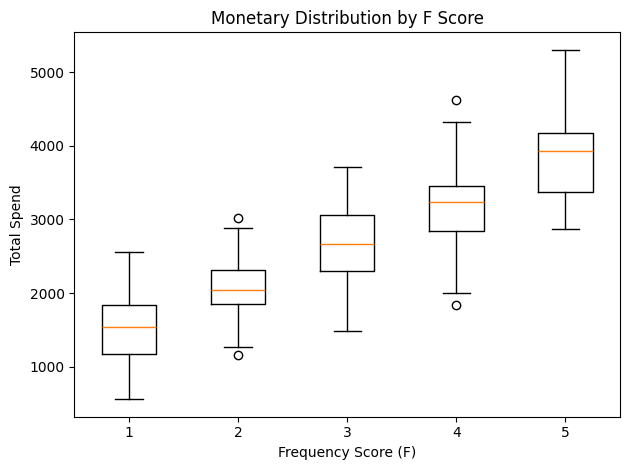

In [22]:
# ─── Cell: Monetary distribution by F score (boxplot) ───────────────────────────
# how does spending vary across frequency quintiles?
data = [
    rfm_df.loc[rfm_df["F"] == score, "monetary"].values
    for score in sorted(rfm_df["F"].unique())
]

plt.figure()
plt.boxplot(data, labels=sorted(rfm_df["F"].unique()))
plt.title("Monetary Distribution by F Score")
plt.xlabel("Frequency Score (F)")
plt.ylabel("Total Spend")
plt.tight_layout()
plt.show()


/var/folders/_z/8qwyks3170ddvfqylm11t5dr0000gp/T/ipykernel_8167/848218173.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=unique_F)


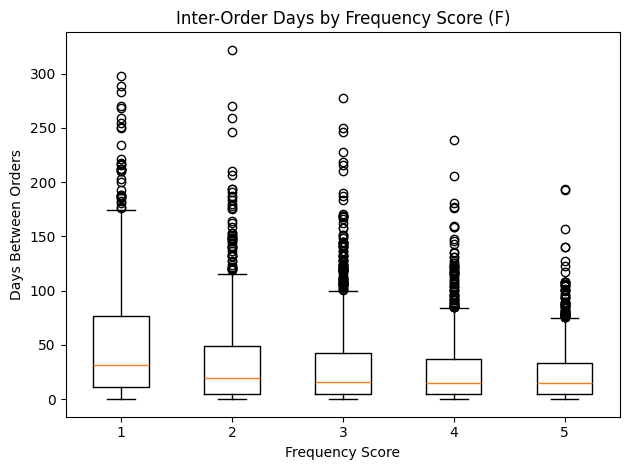

In [24]:
# 2. Compute inter-order lag per customer
df_lag = (
    orders_df
      .sort_values(["customer_id", "order_date"])
      .assign(lag_days=lambda x: x.groupby("customer_id")["order_date"]
                                         .diff().dt.days)
      .dropna(subset=["lag_days"])
)
df_lag = df_lag.merge(
    rfm_df[["customer_id", "F"]],
    on="customer_id",
    how="left"
)
# 4. Boxplot of lag distributions by F score
unique_F = sorted(df_lag["F"].unique())
data = [df_lag.loc[df_lag["F"] == f, "lag_days"] for f in unique_F]

plt.figure()
plt.boxplot(data, labels=unique_F)
plt.title("Inter-Order Days by Frequency Score (F)")
plt.xlabel("Frequency Score")
plt.ylabel("Days Between Orders")
plt.tight_layout()
plt.show()

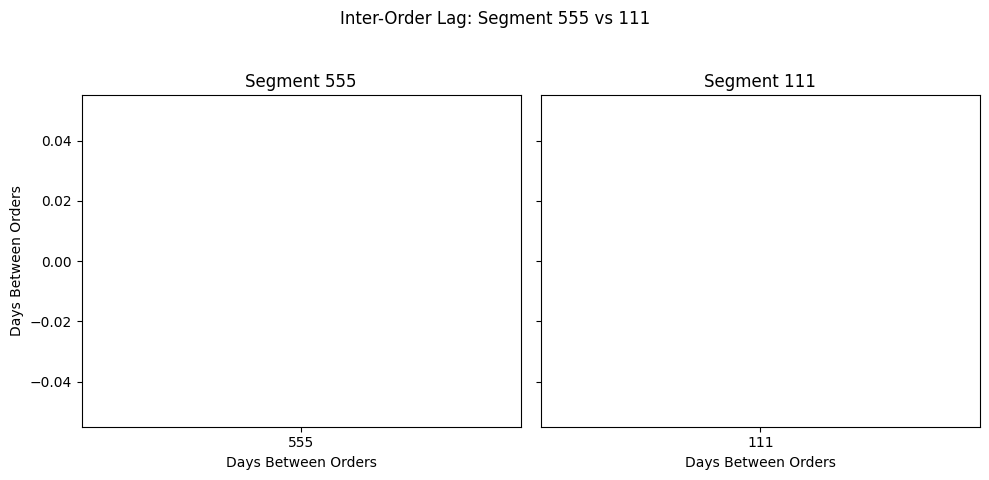

In [25]:
segments = ["555", "111"]
data_by_seg = {}

for seg in segments:
    custs = rfm_df.loc[rfm_df["rfm_segment"] == seg, "customer_id"]
    seg_lags = df_lag.loc[df_lag["customer_id"].isin(custs), "lag_days"]
    data_by_seg[seg] = seg_lags

# 2. Side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
for ax, seg in zip(axes, segments):
    ax.boxplot(data_by_seg[seg])
    ax.set_title(f"Segment {seg}")
    ax.set_xlabel("Days Between Orders")
    ax.set_xticks([1])
    ax.set_xticklabels([seg])

axes[0].set_ylabel("Days Between Orders")
plt.suptitle("Inter-Order Lag: Segment 555 vs 111")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()